In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from numpy import shape
from matplotlib import pyplot as plt
import tensorflow as tf
import sklearn
import glob

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten,Reshape,BatchNormalization
np.set_printoptions(precision=6)
np.set_printoptions(suppress=False)

%matplotlib inline

In [2]:
def import_image(animal,height,width):
    arrayList = []
    for i in range(12500):
        path = "Petimages\\"+ animal +"\\" + str(i) + ".jpg"
        im = cv2.imread(path)
        if (len(np.shape(im)) == 3) & (type(im) != None):
            im = cv2.resize(im[...,::-1],(height,width))
            arrayList.append(im)
    array = np.stack(arrayList,axis=0)
    return array

In [14]:
imSize = 150
Raw_Cat = import_image("Cat",imSize,imSize)
print("Cats Done!")

Raw_Dog = import_image("Dog",imSize,imSize)
print("Dogs Done!")

Cats Done!
Dogs Done!


### Dividing the data into training and testing datasets

In [15]:
#deciding the size of training set and test set
trainSizeCats = int(len(Raw_Cat)*.8)
trainSizeDogs = int(len(Raw_Dog)*.8)

testSizeCats = len(Raw_Cat) - trainSizeCats
testSizeDogs = len(Raw_Dog) - trainSizeDogs

In [ ]:
# extracting the training and testing set x
x_train = np.vstack([Raw_Cat[0:trainSizeCats], Raw_Dog[0:trainSizeDogs]]) * (1/255)
x_test = np.vstack([Raw_Cat[-testSizeCats:], Raw_Dog[-testSizeDogs:]]) * (1/255)
Raw_Cat = Raw_Dog = None

In [ ]:
# extracting the training and testing set y. 1 = cats and 0 = dog
y_train = np.concatenate([np.ones(trainSizeCats,np.uint8),np.zeros(trainSizeDogs,np.uint8)])
y_test = np.concatenate([np.ones(testSizeCats,np.uint8) , np.zeros(testSizeDogs,np.uint8)])

In [ ]:
result = {}

model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(imSize, imSize, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(imSize, imSize, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(imSize, imSize, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(imSize, imSize, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

#recording the result
result2 = history.history["accuracy"]

In [ ]:
# plt.plot(result2)
temp = len(history.history["accuracy"])

plt.plot(history.history["accuracy"][1:temp])
plt.plot(history.history["val_accuracy"][1:temp])

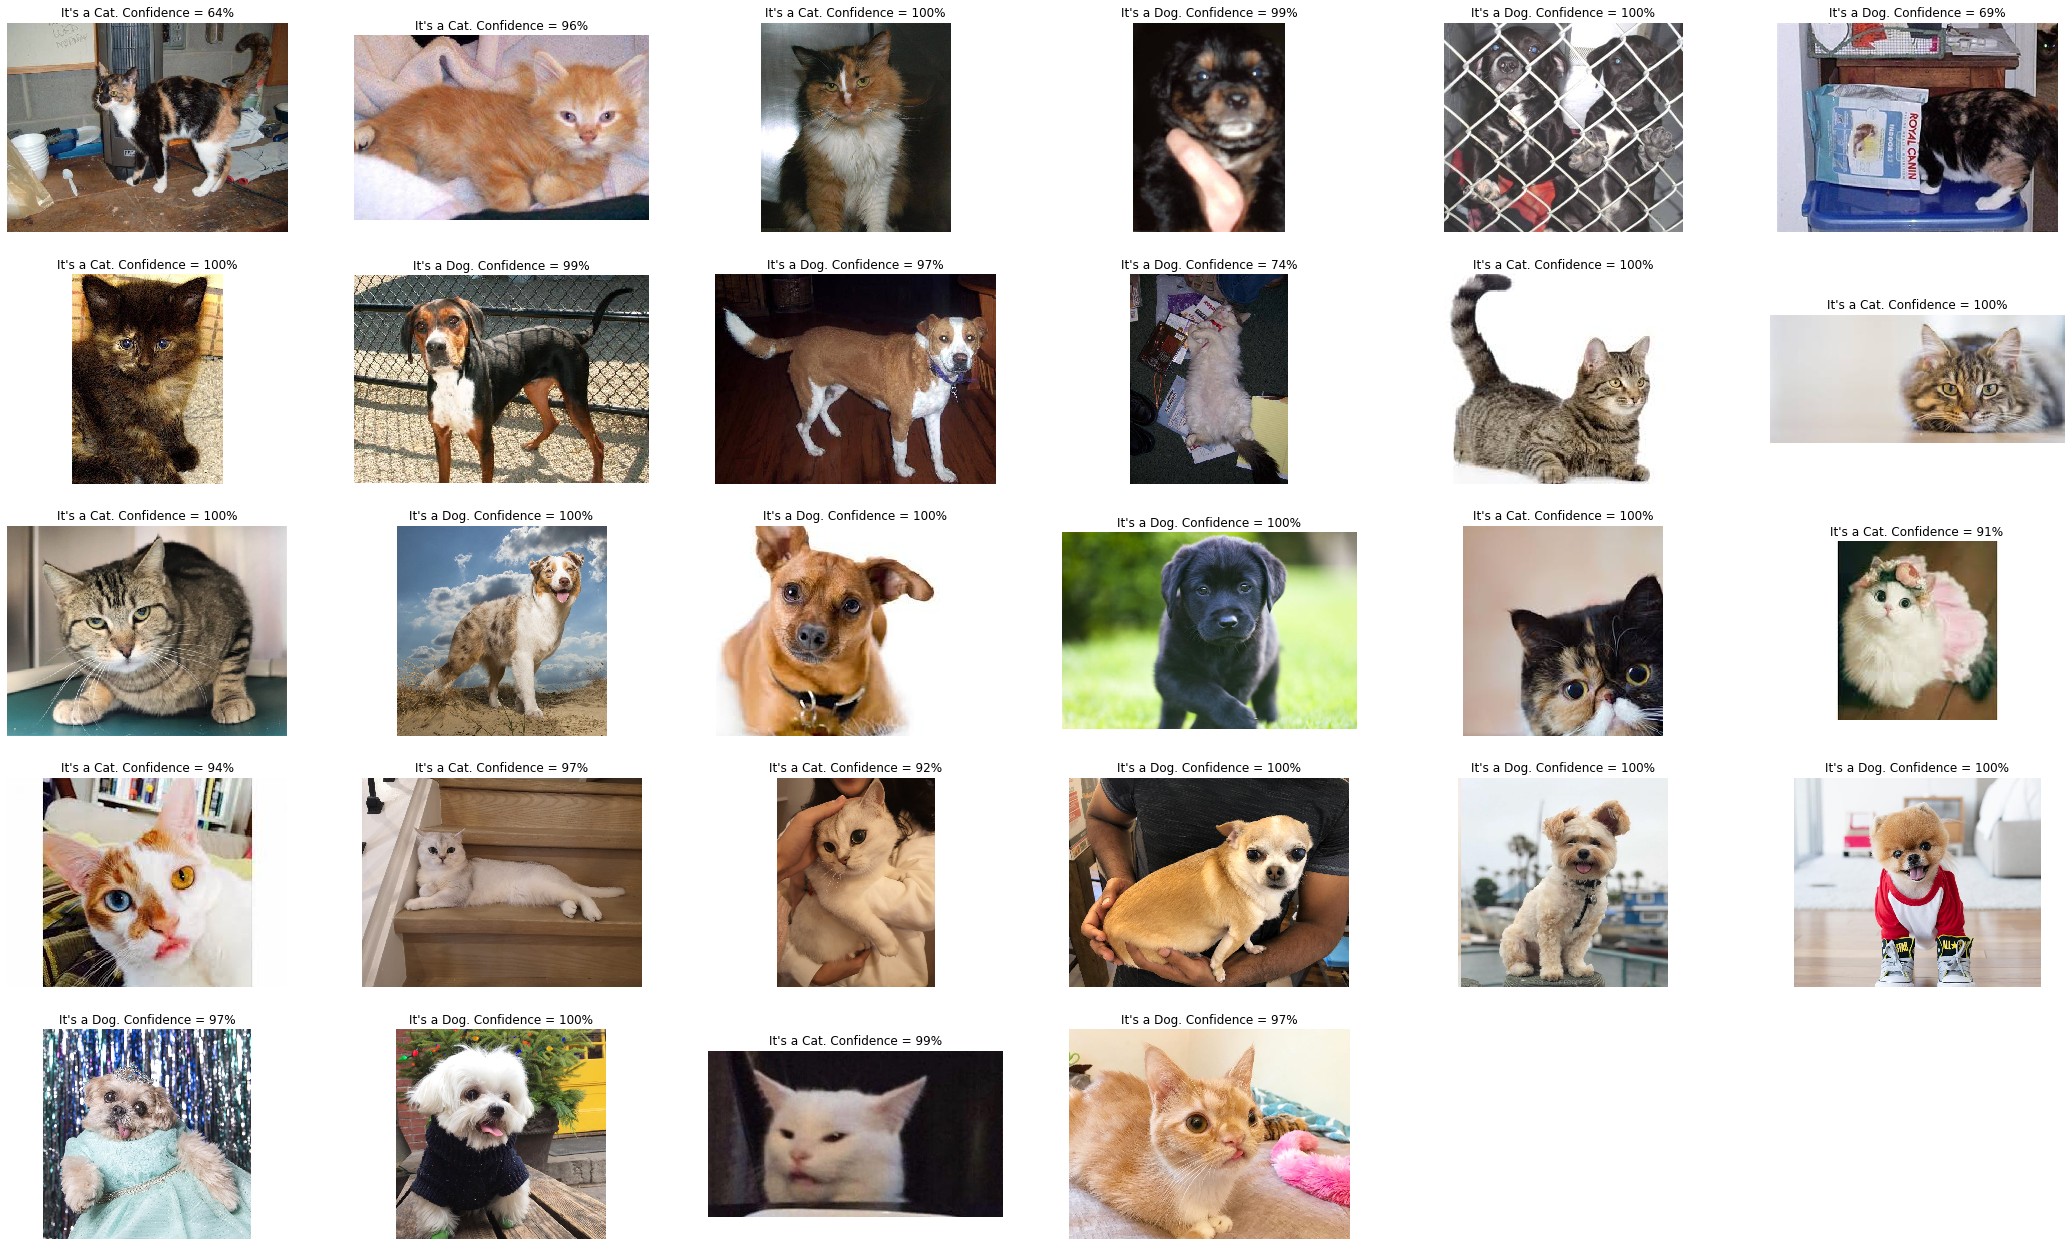

In [172]:
result_label = {0: "It's a Dog", 1: "It's a Cat"}

#Get the number of test pics
predict_list = glob.glob(r"test Predictions\*")
n = len(predict_list)
ncols = math.ceil(n**(1/2))
nrows = math.ceil(n**(1/2))
fig = plt.figure(figsize=(37, 27))

for i,path in enumerate(predict_list):
    ax = fig.add_subplot(ncols,nrows,i+1)
    ax.axis("off")
    im = cv2.imread(path)
    plt.imshow(im[...,::-1])
    im = cv2.resize(im[...,::-1],(imSize,imSize))
    temp = np.stack([im])
    temp=1/255*temp
    ax.title.set_text(result_label[model.predict_classes(temp)[0]] + ". Confidence = " + "{0:.000%}".format(max(model.predict(temp)[0])))

5 5


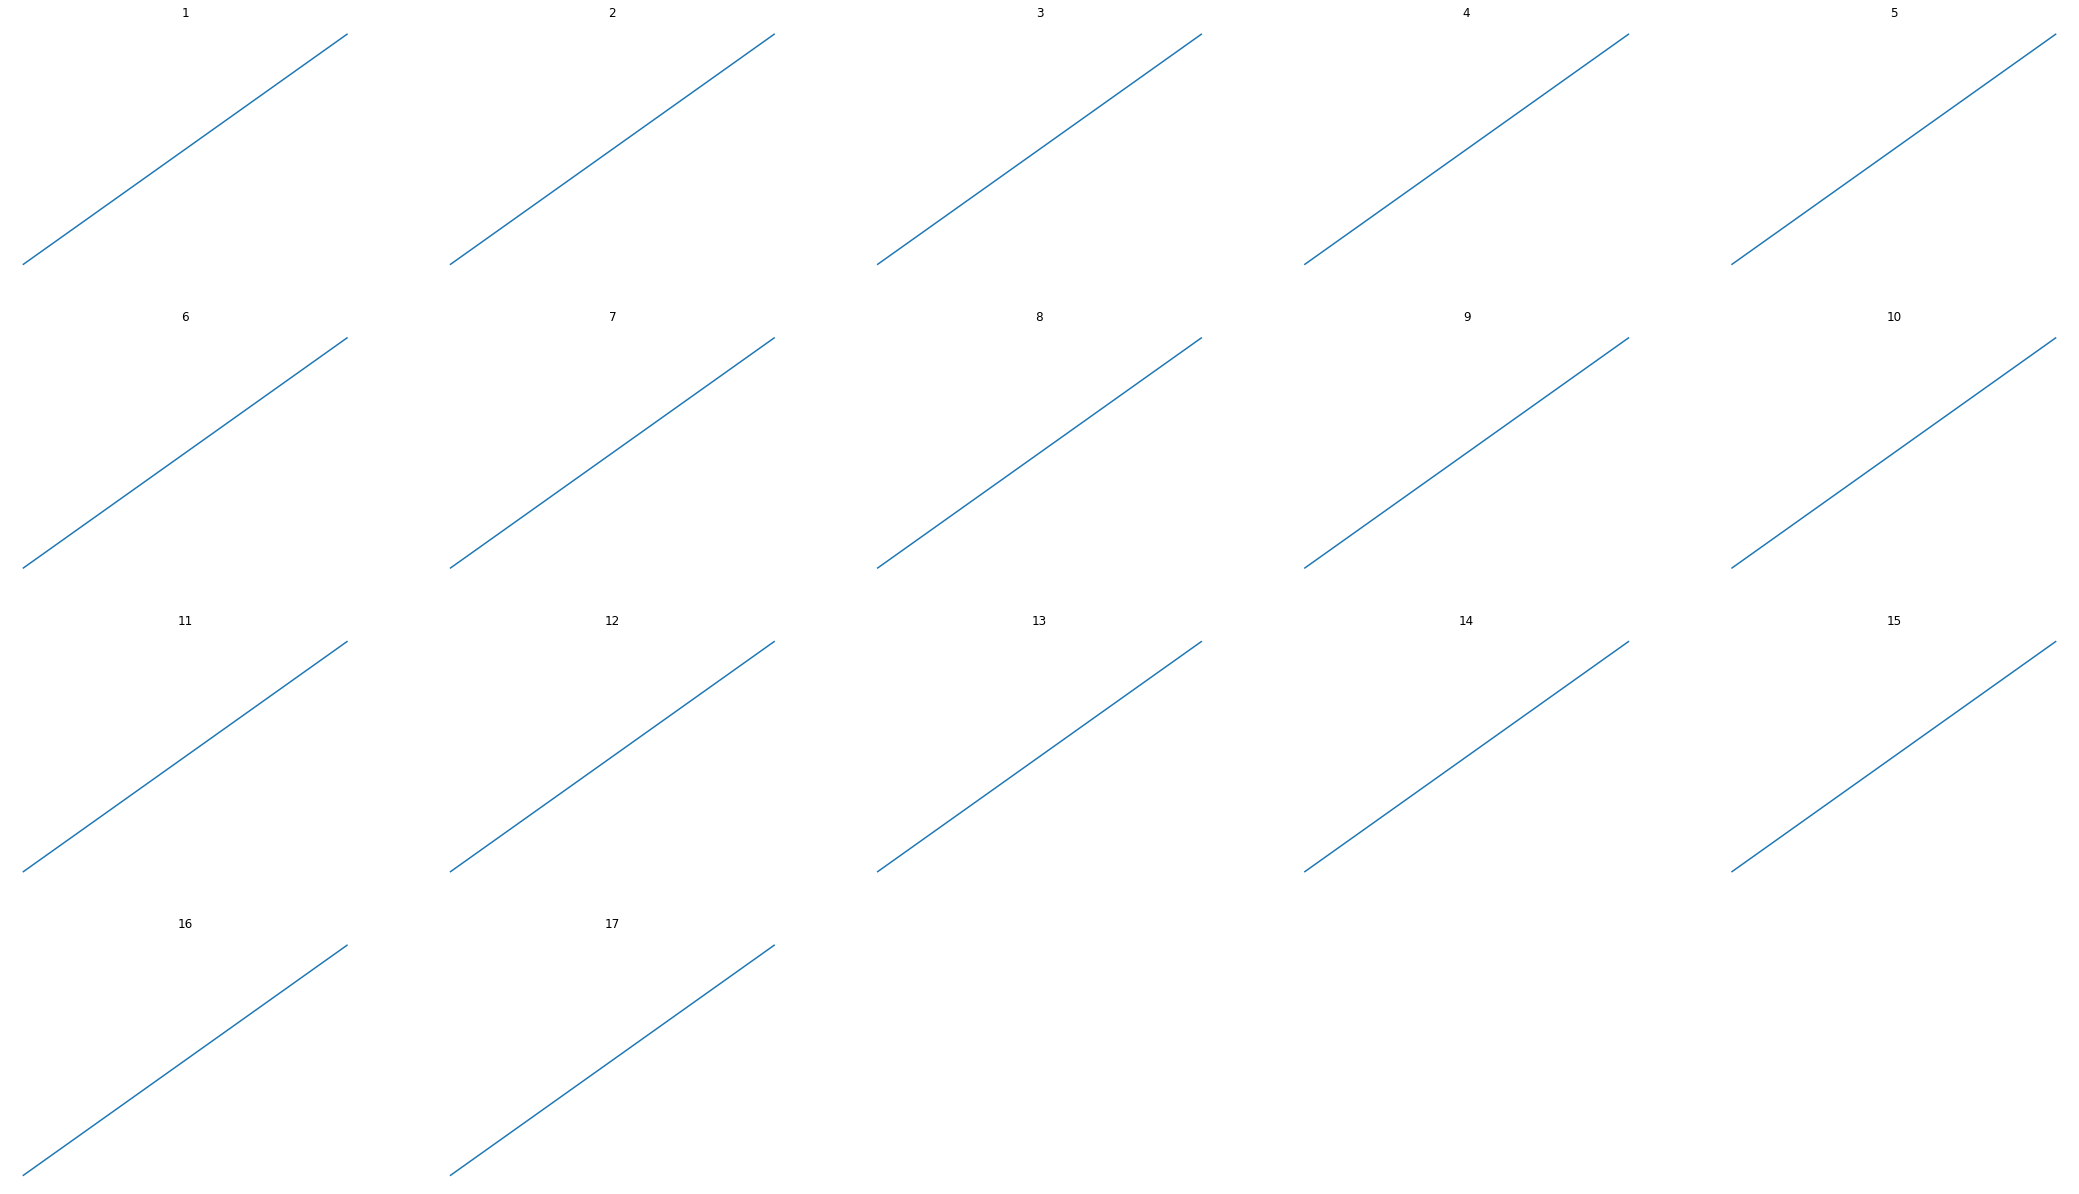

In [141]:
import math

listx = []
for i in range(17):
    x = np.linspace(0, 2*np.pi, 400)
    listx.append(x)
    
n = len(listx)
ncols = math.ceil(n**(1/2))
nrows = math.ceil(n**(1/2))

print(ncols,nrows)
fig = plt.figure(figsize=(37, 27))

for i in range(1,(len(listx)+1)):
    ax = fig.add_subplot(ncols,nrows,i)
    ax.title.set_text(i)
    ax.axis("off")
    ax = plt.plot(x)
    

